In [2]:
import numpy as np                     

import pandas as pd
pd.set_option('mode.chained_assignment', None)      # To suppress pandas warnings.
pd.set_option('display.max_colwidth', None)         # To display all the data in each column
pd.set_option('display.max_columns', None)          # To display every column of the dataset in head()

import warnings
warnings.filterwarnings('ignore')                   # To suppress all the warnings in the notebook.

In [4]:
whm=pd.read_csv('https://github.com/kings-shah/World-happiness-report/blob/main/train_data.csv?raw=true')

In [5]:
whm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1559 entries, 0 to 1558
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      1559 non-null   object 
 1   year                              1559 non-null   int64  
 2   Log GDP per capita                1533 non-null   float64
 3   Social support                    1549 non-null   float64
 4   Healthy life expectancy at birth  1522 non-null   float64
 5   Freedom to make life choices      1537 non-null   float64
 6   Generosity                        1488 non-null   float64
 7   Perceptions of corruption         1473 non-null   float64
 8   Positive affect                   1542 non-null   float64
 9   Negative affect                   1545 non-null   float64
 10  ID                                1559 non-null   int64  
 11  Life Ladder                       1559 non-null   float64
dtypes: flo

<u><b>Observations: </b></u>
1. Total records are:1559
2. 8 Columns with null values are : Log GDP per capita, Social support, Healthy life expectancy at birth, Freedom to make life choices , Generosity, Perceptions of corruption, Positive affect, Negative affect
3. Country name is thee only non numeric feature
4. Life Ladder is float, hence its Regression 

In [88]:
whm.describe(include='all')

,Country name,year,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,ID,Life Ladder
count,1559,1559.000000,1533.000000,1549.000000,1522.000000,1537.000000,1488.000000,1473.000000,1542.000000,1545.000000,1559.000000,1559.000000
unique,165,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Mexico,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2013.131495,9.362995,0.812689,63.331680,0.741882,0.000343,0.748248,0.708551,0.267644,974.962797,5.469321
std,NaN,4.206026,1.160240,0.118762,7.478307,0.142326,0.163385,0.186708,0.108029,0.084431,562.023107,1.113280
min,NaN,2005.000000,6.635000,0.290000,32.300000,0.260000,-0.335000,0.035000,0.322000,0.083000,0.000000,2.375000
25%,NaN,2010.000000,8.460000,0.753000,58.340000,0.646000,-0.113000,0.691000,0.623000,0.206000,494.500000,4.649500
50%,NaN,2013.000000,9.456000,0.835000,65.180000,0.763000,-0.025000,0.804000,0.721000,0.258000,973.000000,5.374000
75%,NaN,2017.000000,10.332000,0.905000,68.535000,0.855000,0.091000,0.873000,0.798000,0.319000,1459.500000,6.272500


<b><u>Observations:</b></u>
1. 165 uniquie Countries
2. Year - 2005 to 2020
3. Social support, Freedom to make life choices, Perceptions of corruption, Positive affect, Negative affect	have values between 0 to 1
4. Generosity has values between -1 to 1
5. Mean Life expentancy is 63, close to max value 77 so not normaly distirbuted
6. Life Ladder values range between 0 to 10


In [89]:
import seaborn as sns; sns.set_theme()

In [90]:
#correlation table
whm.corr()

,year,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,ID,Life Ladder
year,1.000000,0.075898,-0.006905,0.163621,0.211746,-0.043776,-0.072938,-0.001709,0.199585,0.000577,0.033604
Log GDP per capita,0.075898,1.000000,0.696893,0.850872,0.359674,-0.006162,-0.341493,0.296017,-0.215581,0.005695,0.786712
Social support,-0.006905,0.696893,1.000000,0.621460,0.420372,0.062367,-0.225764,0.424982,-0.403880,0.134547,0.703878
Healthy life expectancy at birth,0.163621,0.850872,0.621460,1.000000,0.381830,0.019077,-0.322159,0.311821,-0.137307,-0.013300,0.750773
Freedom to make life choices,0.211746,0.359674,0.420372,0.381830,1.000000,0.327079,-0.480826,0.614398,-0.272536,0.048318,0.529819
Generosity,-0.043776,-0.006162,0.062367,0.019077,0.327079,1.000000,-0.276108,0.377166,-0.106673,0.093828,0.194970
Perceptions of corruption,-0.072938,-0.341493,-0.225764,-0.322159,-0.480826,-0.276108,1.000000,-0.300299,0.277781,-0.043447,-0.427562
Positive affect,-0.001709,0.296017,0.424982,0.311821,0.614398,0.377166,-0.300299,1.000000,-0.357850,0.045986,0.534640
Negative affect,0.199585,-0.215581,-0.403880,-0.137307,-0.272536,-0.106673,0.277781,-0.357850,1.000000,-0.143134,-0.301821
ID,0.000577,0.005695,0.134547,-0.013300,0.048318,0.093828,-0.043447,0.045986,-0.143134,1.000000,-0.000884


<b><u>Observations:</b></u>
1. Positive effect, Log GDP per capita, Social support	Healthy life expectancy at birth is highly positively corelated with Life Ladder
2. Negative affect and Perceptions of corruption is negatively corelated with Life Ladder

# total number of null values =283

In [91]:
whm.isnull().sum().sum()

283

In [92]:
whm.columns

Index(['Country name', 'year', 'Log GDP per capita', 'Social support',
       'Healthy life expectancy at birth', 'Freedom to make life choices',
       'Generosity', 'Perceptions of corruption', 'Positive affect',
       'Negative affect', 'ID', 'Life Ladder'],
      dtype='object')

In [93]:
whm['Country name'].value_counts()

Mexico        15
Jordan        15
Egypt         14
Cameroon      14
Kazakhstan    14
              ..
Somalia        1
Suriname       1
Guyana         1
Maldives       1
Cuba           1
Name: Country name, Length: 165, dtype: int64

In [94]:
#mean for each country
whm[whm['Country name']=='Maldives']['Negative affect'].mean()

nan

In [95]:
whm[whm['Country name']=='Guyana']

,Country name,year,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,ID,Life Ladder
744,Guyana,2007,8.773,0.849,57.26,0.694,0.11,0.836,0.768,0.296,673,5.993


In [96]:
whm.isnull().sum()

Country name                         0
year                                 0
Log GDP per capita                  26
Social support                      10
Healthy life expectancy at birth    37
Freedom to make life choices        22
Generosity                          71
Perceptions of corruption           86
Positive affect                     17
Negative affect                     14
ID                                   0
Life Ladder                          0
dtype: int64

In [97]:
#replacing with mean of the coutry
null_col=['Log GDP per capita', 'Social support','Healthy life expectancy at birth', 'Freedom to make life choices',
       'Generosity', 'Perceptions of corruption', 'Positive affect','Negative affect']
for x in null_col:
    for (row,col) in whm.iterrows():
        country=col['Country name']
        if(pd.isnull(col[x])):
            whm.loc[row,x]=whm[whm['Country name']==country][x].mean()
    

In [98]:
whm.isnull().sum().sum()

67

In [99]:
#replacing null values with the general mean for those whose country mean is null for the column

null_col=['Log GDP per capita', 'Social support','Healthy life expectancy at birth', 'Freedom to make life choices',
       'Generosity', 'Perceptions of corruption', 'Positive affect','Negative affect']
for x in null_col:
    for (row,col) in whm.iterrows():
        #country=col['Country name']
        if(pd.isnull(col[x])):
            whm.loc[row,x]=whm[x].mean()

In [100]:
whm.describe(include='all')

,Country name,year,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,ID,Life Ladder
count,1559,1559.000000,1559.000000,1559.000000,1559.000000,1559.000000,1559.000000,1559.000000,1559.000000,1559.000000,1559.000000,1559.000000
unique,165,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Mexico,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2013.131495,9.365479,0.812861,63.354851,0.742776,0.000776,0.741687,0.708172,0.267823,974.962797,5.469321
std,NaN,4.206026,1.154982,0.118541,7.400246,0.142161,0.162223,0.187902,0.107801,0.084221,562.023107,1.113280
min,NaN,2005.000000,6.635000,0.290000,32.300000,0.260000,-0.335000,0.035000,0.322000,0.083000,0.000000,2.375000
25%,NaN,2010.000000,8.465500,0.753000,58.700000,0.647000,-0.113500,0.683500,0.623000,0.206808,494.500000,4.649500
50%,NaN,2013.000000,9.450000,0.836000,65.100000,0.764000,-0.022000,0.797000,0.721000,0.259000,973.000000,5.374000
75%,NaN,2017.000000,10.331500,0.905000,68.510000,0.856000,0.091000,0.868000,0.798000,0.320000,1459.500000,6.272500


<Figure size 720x360 with 0 Axes>

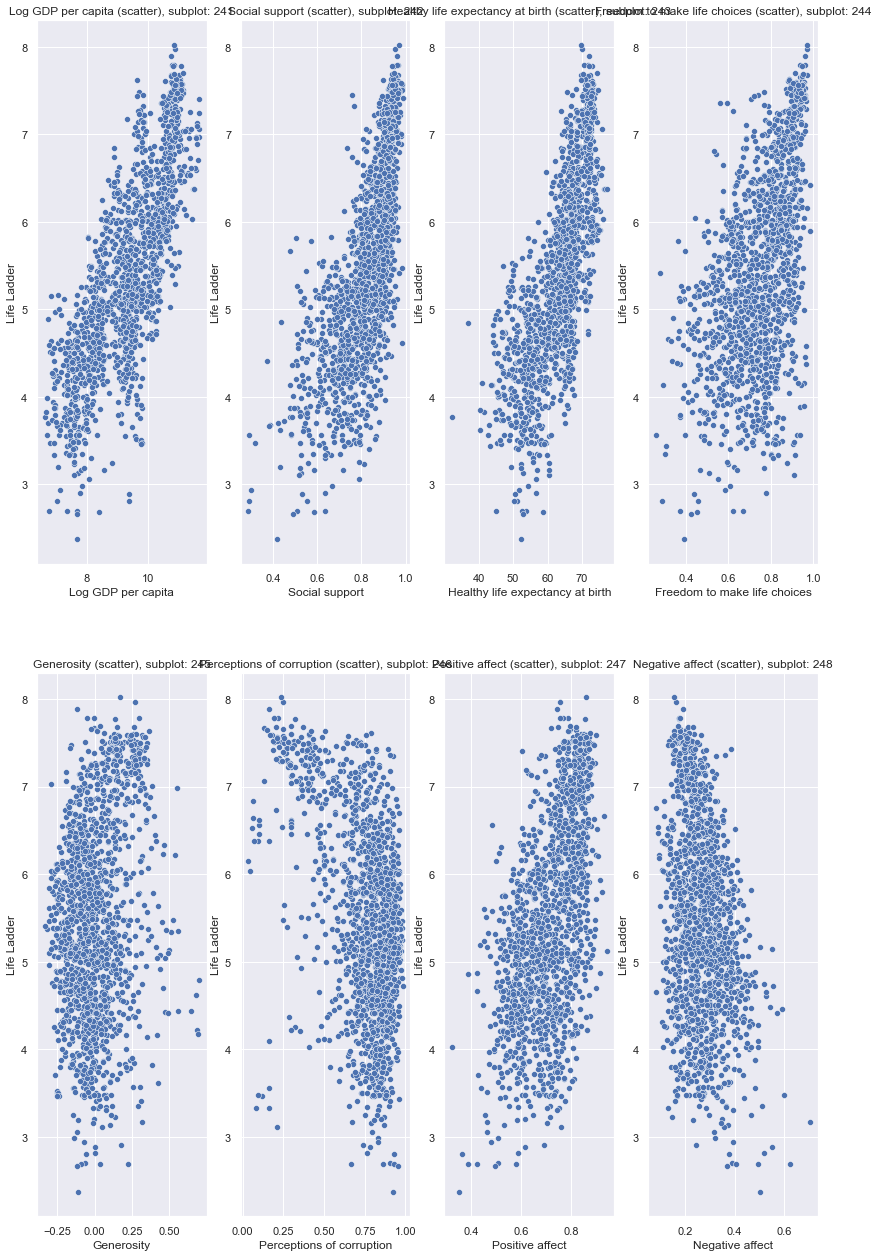

In [101]:
#scatter subplot
import matplotlib.pyplot as plt
%matplotlib inline

#create a Figure instance that would contain all the plot elements and set the figure size
plt.figure(figsize=(10,5))
col=['Log GDP per capita', 'Social support','Healthy life expectancy at birth', 'Freedom to make life choices',
       'Generosity', 'Perceptions of corruption', 'Positive affect','Negative affect']
#  plot Numerical Data
a = 2  # number of rows
b = 4  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(14,22))

for i in col:
    plt.subplot(a, b, c)
    plt.title('{} (scatter), subplot: {}{}{}'.format(i, a, b, c))
    plt.xlabel(i)
    sns.scatterplot(data = whm, x = i, y = 'Life Ladder')
    c = c + 1

In [102]:
whm.head()

,Country name,year,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,ID,Life Ladder
0,Jordan,2008,9.343,0.766000,64.22,0.742308,-0.127000,0.7090,0.669000,0.331000,862,4.930
1,Estonia,2013,10.299,0.901000,67.48,0.754000,-0.201000,0.7260,0.702000,0.199000,534,5.367
2,Sweden,2018,10.881,0.931000,72.60,0.942000,0.077000,0.2630,0.823000,0.161000,1649,7.375
3,Tajikistan,2006,7.554,0.724000,60.64,0.702000,-0.088000,0.7680,0.566000,0.195000,1682,4.613
4,Kuwait,2014,10.945,0.869875,65.80,0.835875,-0.055167,0.5015,0.741875,0.257625,925,6.180


In [103]:
whm['Country name'].value_counts().head(20)

Mexico           15
Jordan           15
Egypt            14
Cameroon         14
Kazakhstan       14
South Korea      14
Uganda           14
Vietnam          14
Italy            14
Niger            14
United States    14
Belgium          14
Costa Rica       14
Greece           14
Moldova          14
Lebanon          13
Mongolia         13
Turkey           13
Tajikistan       13
Thailand         13
Name: Country name, dtype: int64

Text(0.5, 1.0, 'Median Life Ladder per Country')

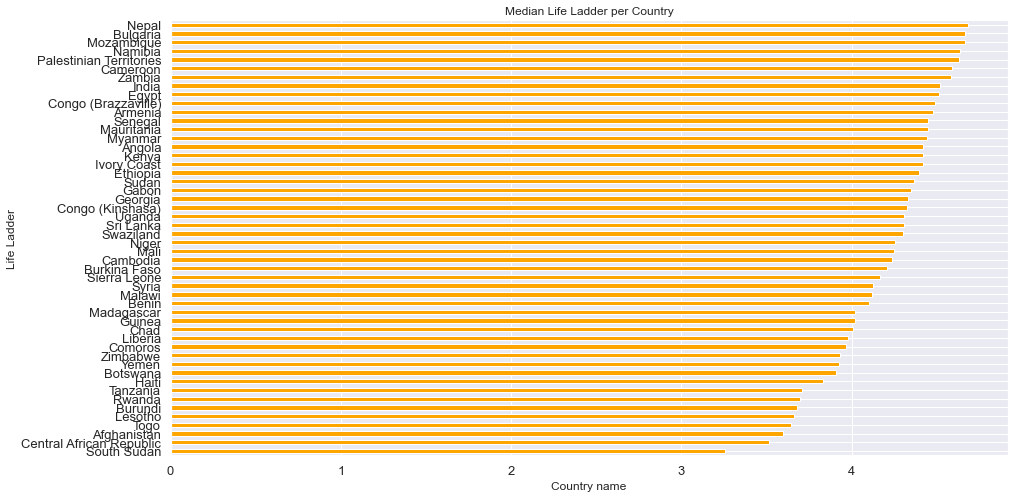

In [104]:
whm.groupby(['Country name'])['Life Ladder'].mean().sort_values().head(50).plot(kind='barh', figsize=(15,8), fontsize=13, color='orange')
plt.xlabel('Country name')
plt.ylabel('Life Ladder')
plt.title("Median Life Ladder per Country")

In [105]:
whm[whm['Country name']=='Mexico'].sort_values(by='year')

,Country name,year,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,ID,Life Ladder
759,Mexico,2005,9.788,0.903,66.20,0.814,-0.124571,0.764,0.820,0.219,1108,6.581
1357,Mexico,2007,9.825,0.879,66.32,0.670,-0.095000,0.747,0.816,0.248,1109,6.525
37,Mexico,2008,9.821,0.876,66.38,0.677,-0.128000,0.785,0.825,0.201,1110,6.829
477,Mexico,2009,9.752,0.868,66.44,0.682,-0.076000,0.764,0.849,0.196,1111,6.963
166,Mexico,2010,9.788,0.876,66.50,0.778,-0.048000,0.693,0.840,0.215,1112,6.802
640,Mexico,2011,9.810,0.824,66.68,0.831,-0.099000,0.698,0.790,0.228,1113,6.910
603,Mexico,2012,9.832,0.767,66.86,0.788,-0.093000,0.633,0.784,0.278,1114,7.320
1094,Mexico,2013,9.832,0.759,67.04,0.739,-0.165000,0.615,0.790,0.223,1115,7.443
79,Mexico,2014,9.847,0.782,67.22,0.779,-0.094000,0.630,0.802,0.229,1116,6.680
719,Mexico,2015,9.867,0.761,67.40,0.719,-0.152000,0.708,0.745,0.237,1117,6.236


Observation:
1. GDP is almost the same
2. SS has Dec
3. NA has inc over the years
4. LL has decreased
5. Health expectancy has increased

In [106]:
#def encoding_cntry(whm):
 #   cntry=pd.get_dummies(whm['Country name'])
  #  whm=pd.concat([whm,cntry],axis=1)
    #return whm
#whm=encoding_cntry(whm)

In [107]:
whm.drop('Country name',axis=1,inplace=True)
#whm.drop('ID',axis=1,inplace=True)

In [108]:
#Basic Linear Regression Model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

X=whm.drop('Life Ladder',axis=1)
#X=demo[['cement','age','water']]
y=whm[['Life Ladder']]
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size= .20, random_state=10)

In [109]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
scaledXtrain = sc.fit_transform(Xtrain)
scaledXtest = sc.transform(Xtest)
lr = LinearRegression()
lr.fit(Xtrain,ytrain)
print("Training R2")
print(lr.score(Xtrain,ytrain))
print("Testing R2")
print(lr.score(Xtest,ytest))

Training R2
0.7582519805425838
Testing R2
0.8005467043493996


In [110]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
pipeRF = Pipeline((
("rf", RandomForestRegressor(n_estimators=200,random_state=10)),
))
pipeRF.fit(Xtrain,ytrain)
print("Training R2")
print(pipeRF.score(Xtrain,ytrain))
print("Testing R2")
print(pipeRF.score(Xtest,ytest))
scoresRF = cross_val_score(pipeRF,Xtrain,ytrain,cv=10)
print(scoresRF)
print("Average R2")
print(np.mean(scoresRF))

Training R2
0.9817243831494913
Testing R2
0.9005097953777751
[0.8941524  0.87453482 0.86506607 0.84353817 0.86650028 0.87058196
 0.87177677 0.82236926 0.85404523 0.88434684]
Average R2
0.8646911788251913


In [111]:
from sklearn.tree import DecisionTreeRegressor
pipeDT = Pipeline((
#("pt",PowerTransformer()),
("dt", DecisionTreeRegressor(max_depth=20,random_state=10)),
))
pipeDT.fit(Xtrain,ytrain)
print("Training R2")
print(pipeDT.score(Xtrain,ytrain))
print("Testing R2")
print(pipeDT.score(Xtest,ytest))
scoresdt = cross_val_score(pipeDT,Xtrain,ytrain,cv=10)
print(scoresdt)
print("Average R2")
print(np.mean(scoresdt))

Training R2
0.9999999840442656
Testing R2
0.7827699248751879
[0.70661989 0.71166693 0.71184186 0.62519398 0.7049246  0.77898671
 0.75221832 0.71690568 0.68120565 0.74769051]
Average R2
0.7137254135254318


In [112]:
from sklearn.ensemble import GradientBoostingRegressor
pipeGB = Pipeline((
#("pt",PowerTransformer()),
("GB", GradientBoostingRegressor(n_estimators=1500,random_state=10)),
))
pipeGB.fit(Xtrain,ytrain)
print("Training R2")
print(pipeGB.score(Xtrain,ytrain))
print("Testing R2")
print(pipeGB.score(Xtest,ytest))
scoresGB = cross_val_score(pipeGB,Xtrain,ytrain,cv=10)
print(scoresGB)
print("Average R2")
print(np.mean(scoresGB))

Training R2
0.9980953917783659
Testing R2
0.8835164695661499
[0.87111997 0.85111743 0.8446494  0.80737215 0.8515689  0.86293923
 0.87967475 0.84634531 0.86381271 0.85620562]
Average R2
0.8534805472270758


In [6]:
whm_test=pd.read_csv('https://github.com/kings-shah/World-happiness-report/blob/main/test_data_whm.csv?raw=true')

In [7]:
whm_test.isnull().sum().sum()

90

In [115]:
#replacing with mean of the coutry
null_col=['Log GDP per capita', 'Social support','Healthy life expectancy at birth', 'Freedom to make life choices',
       'Generosity', 'Perceptions of corruption', 'Positive affect','Negative affect']
for x in null_col:
    for (row,col) in whm_test.iterrows():
        country=col['Country name']
        if(pd.isnull(col[x])):
            whm_test.loc[row,x]=whm_test[whm_test['Country name']==country][x].mean()

In [116]:

#replacing null values with the general mean for those whose country mean is null for the column
null_col=['Log GDP per capita', 'Social support','Healthy life expectancy at birth', 'Freedom to make life choices',
       'Generosity', 'Perceptions of corruption', 'Positive affect','Negative affect']
for x in null_col:
    for (row,col) in whm_test.iterrows():
        #country=col['Country name']
        if(pd.isnull(col[x])):
            whm_test.loc[row,x]=whm_test[x].mean()

In [117]:
whm_test.isnull().sum().sum()

0

In [118]:
whm_test.drop('Country name',axis=1,inplace=True)
#ID_col=whm_test.ID
#whm_test.drop('ID',axis=1,inplace=True)

In [119]:
y_pred_final=pipeGB.predict(whm_test)

In [120]:
df3 = pd.DataFrame({"ID":whm_test.ID,"Life_Ladder":y_pred_final})

In [121]:
df3.to_csv('World_happiness_output.csv',index=False, header=False)